<a href="https://colab.research.google.com/github/raine88/dai-101-1/blob/main/DAI_TUT_1_RENUKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/Most Runs - 2022.csv')
df.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83,45
1,2,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45,30
2,3,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47,23
3,4,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49,12
4,5,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51,11


In [ ]:
df.tail()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
157,158,Fazalhaq Farooqi,3,1,1,2,2*,-,8,25.00,0,0,0,0
158,159,Jagadeesha Suchith,5,2,0,2,2,1,8,25.00,0,0,0,0
159,160,Tim Southee,9,5,1,2,1*,0.5,12,16.66,0,0,0,0
160,161,Nathan Coulter-Nile,1,1,1,1,1*,-,2,50.00,0,0,0,0
161,162,Anrich Nortje,6,1,1,1,1*,-,6,16.66,0,0,0,0


In [ ]:
print(df.shape)

df.describe()

(162, 14)


,POS,Mat,Inns,NO,Runs,BF,SR,100,50,4s,6s
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,81.500000,9.160494,7.141975,1.586420,142.296296,106.061728,120.406235,0.049383,0.679012,12.450617,6.555556
std,46.909487,5.047493,4.816982,1.819989,161.252161,114.571234,45.192799,0.366322,1.172428,15.314529,8.070343
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,16.660000,0.000000,0.000000,0.000000,0.000000
25%,41.250000,5.000000,3.000000,0.000000,14.500000,14.000000,94.082500,0.000000,0.000000,1.000000,0.000000
50%,81.500000,9.500000,7.000000,1.000000,65.000000,47.500000,123.620000,0.000000,0.000000,5.000000,3.000000
75%,121.750000,14.000000,11.000000,2.000000,241.500000,176.500000,144.247500,0.000000,1.000000,21.000000,11.000000
max,162.000000,17.000000,17.000000,10.000000,863.000000,579.000000,400.000000,4.000000,5.000000,83.000000,45.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     162 non-null    int64  
 1   Player  162 non-null    object 
 2   Mat     162 non-null    int64  
 3   Inns    162 non-null    int64  
 4   NO      162 non-null    int64  
 5   Runs    162 non-null    int64  
 6   HS      162 non-null    object 
 7   Avg     162 non-null    object 
 8   BF      162 non-null    int64  
 9   SR      162 non-null    float64
 10  100     162 non-null    int64  
 11  50      162 non-null    int64  
 12  4s      162 non-null    int64  
 13  6s      162 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 17.8+ KB


In [ ]:
df.dtypes


,0
POS,int64
Player,object
Mat,int64
Inns,int64
NO,int64
Runs,int64
HS,object
Avg,object
BF,int64
SR,float64


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
157,False
158,False
159,False
160,False


In [ ]:
df.replace("-", np.nan, inplace=True)
#instead of null values, our data has "-" in it. this code will help us convert "-" to NaN (not-a-number)and later we can remove them.

In [ ]:
null_values = df.isnull()
print(null_values)

       POS  Player    Mat   Inns     NO   Runs     HS    Avg     BF     SR  \
0    False   False  False  False  False  False  False  False  False  False   
1    False   False  False  False  False  False  False  False  False  False   
2    False   False  False  False  False  False  False  False  False  False   
3    False   False  False  False  False  False  False  False  False  False   
4    False   False  False  False  False  False  False  False  False  False   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
157  False   False  False  False  False  False  False   True  False  False   
158  False   False  False  False  False  False  False  False  False  False   
159  False   False  False  False  False  False  False  False  False  False   
160  False   False  False  False  False  False  False   True  False  False   
161  False   False  False  False  False  False  False   True  False  False   

       100     50     4s     6s  
0    False  False  False  Fal

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       8
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64


In [ ]:
df.dropna(inplace=True)


In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64


after dropping the nulls, we have 0 null values.

In [ ]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)

In [ ]:
cat

['NO', '100', '50']

In [ ]:
num

['POS', 'Player', 'Mat', 'Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR', '4s', '6s']

In [ ]:
# Normalize the variables
scaler = MinMaxScaler()
df = pd.read_csv('/Most Runs - 2022.csv')
df[['Runs', 'BF']] = scaler.fit_transform(df[['Runs', 'BF']])

# Check the result
df.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Jos Buttler,17,17,2,1.000000,116,57.53,1.000000,149.05,4,4,83,45
1,2,K L Rahul,15,15,3,0.713457,103*,51.33,0.785467,135.38,2,4,45,30
2,3,Quinton De Kock,15,15,1,0.588167,140*,36.29,0.588235,148.97,1,3,47,23
3,4,Hardik Pandya,15,15,4,0.563805,87*,44.27,0.640138,131.26,0,4,49,12
4,5,Shubman Gill,16,16,2,0.559165,96,34.5,0.629758,132.32,0,4,51,11


UNIVARIATE ANALYSIS
1. CATEGORICAL


PIE CHART

Text(0.5, 1.0, 'NOT OUT')

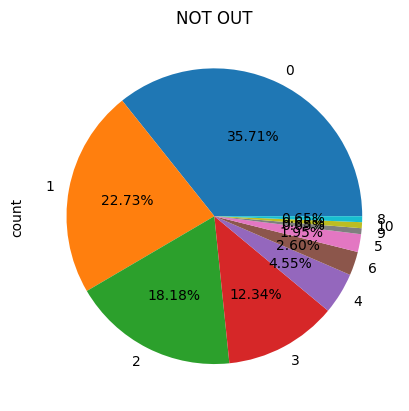

In [ ]:
df['NO'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('NOT OUT')

In [ ]:
df['NO'].value_counts()

,count
NO,
0,55
1,35
2,28
3,19
4,7
6,4
5,3
9,1
10,1


Text(0.5, 1.0, 'Mode of not outs')

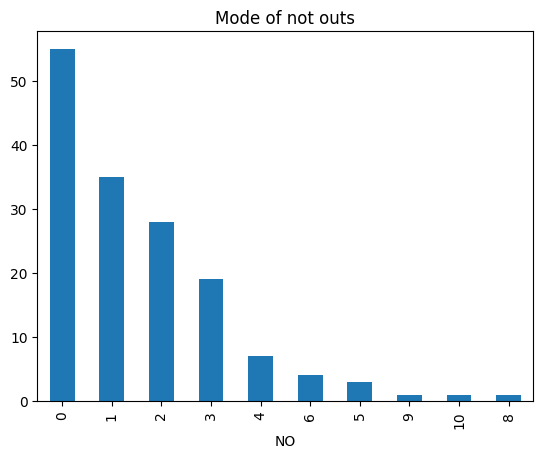

In [ ]:
df['NO'].value_counts().plot(kind="bar")
plt.title('Mode of not outs')

Text(0.5, 1.0, 'CENTURIES')

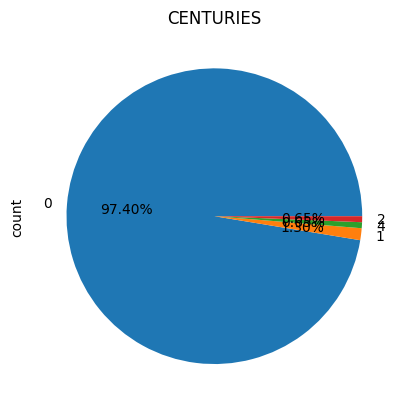

In [ ]:
df['100'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('CENTURIES')

Text(0.5, 1.0, 'Mode of centuries')

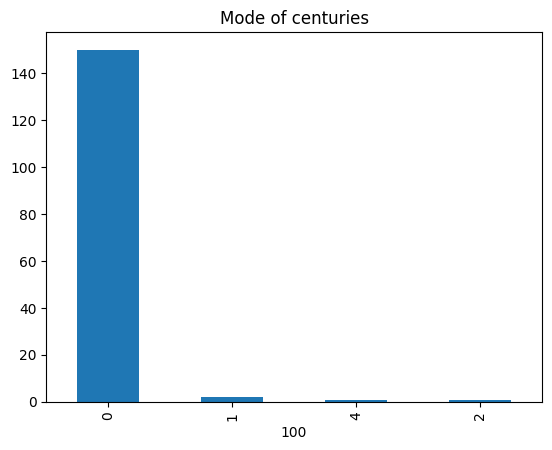

In [ ]:
df['100'].value_counts().plot(kind="bar")
plt.title('Mode of centuries')

Text(0.5, 1.0, 'HALF CENTURIES')

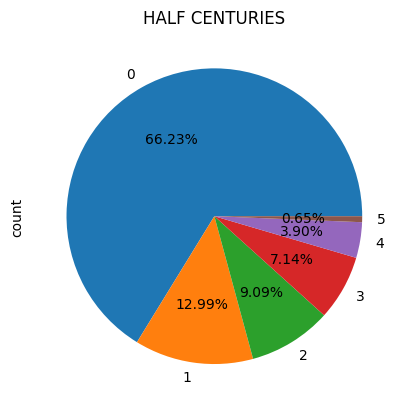

In [ ]:
df['50'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('HALF CENTURIES')

Text(0.5, 1.0, 'Mode of Half Centuries')

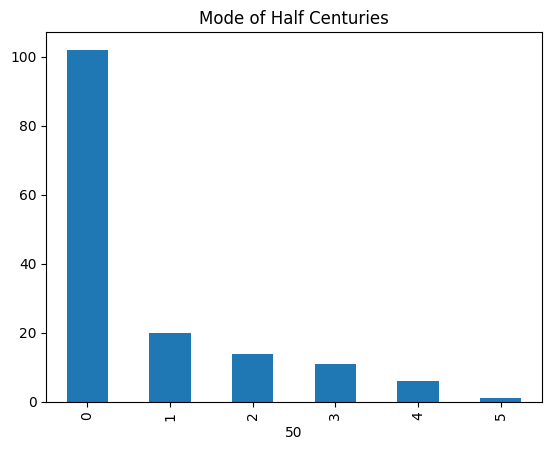

In [ ]:
df['50'].value_counts().plot(kind="bar")
plt.title('Mode of Half Centuries')

2.NUMERICAL


In [ ]:
num

['POS', 'Player', 'Mat', 'Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR', '4s', '6s']

0.8215102127287628

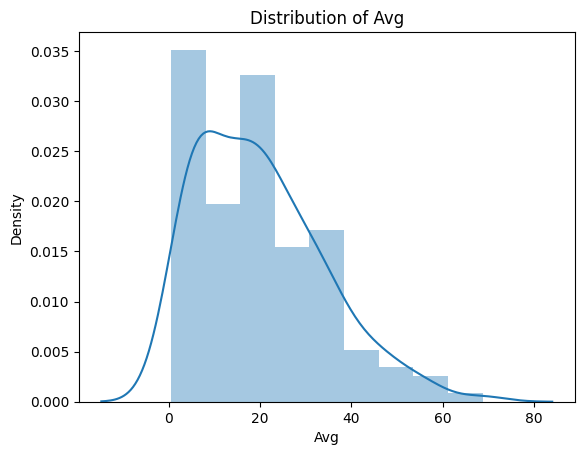

In [ ]:
sns.distplot(df["Avg"])
plt.title('Distribution of Avg')
df['Avg'].skew()


From the plot and the value of skewness, A skewness value of 0.8215 suggests a moderate positive skew.

1.2836368313752702

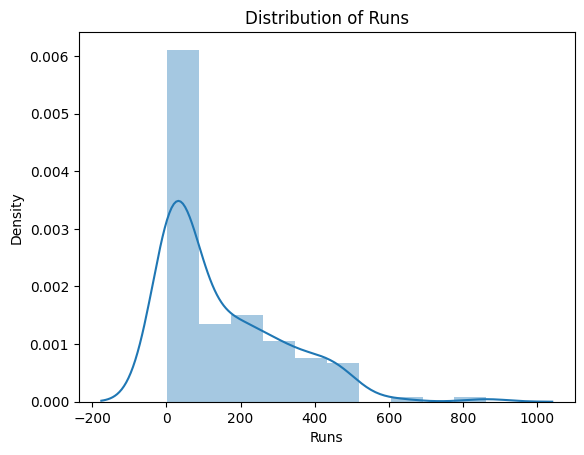

In [ ]:
sns.distplot(df["Runs"])
plt.title('Distribution of Runs')
df['Runs'].skew()

this plot is also right skewed. we can also observe a very sharp peak here indicating more batsmen having number of runs in the range of 0-80.

1.4810406911448877

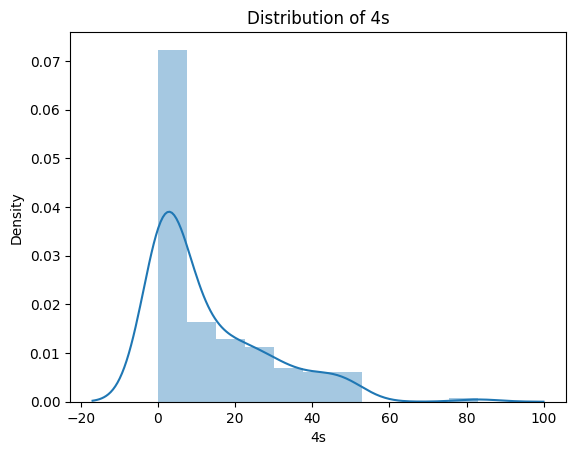

In [ ]:
sns.distplot(df["4s"])
plt.title('Distribution of 4s')
df['4s'].skew()

In [ ]:
num


['POS', 'Player', 'Mat', 'Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR', '4s', '6s']

-0.0872626881209467

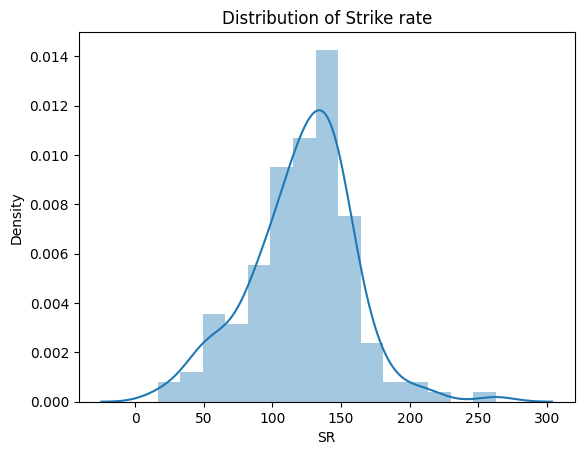

In [ ]:
sns.distplot(df["SR"])
plt.title('Distribution of Strike rate')
df['SR'].skew()

this data is left skewed.

# BOX PLOT

Text(0.5, 1.0, 'Box Plot of strike rate')

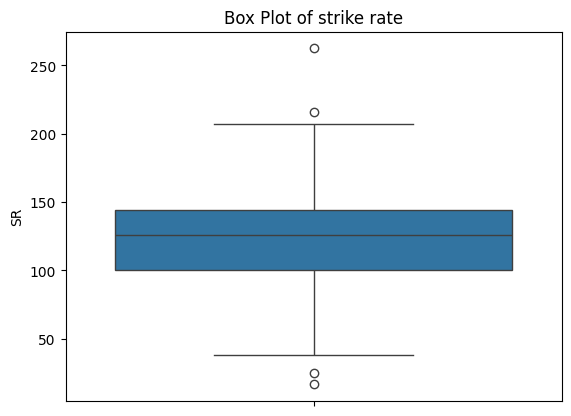

In [ ]:
sns.boxplot(df['SR'])
plt.title('Box Plot of strike rate')

### In this box plot, we can se the minimun and maximum value of cogs. the middle line in the blue box denotes the median of the cogs i.e 131. The lower bound of the box denotes the 1st quartile i.e the 25% of value lies between minimum and 1st quartile value. The upper bound of box denotes 3rd quartile. We have outliers over upper bound (above 1.5 times IQR(inter-quartile ratio)) which denotes extreme values, or the presence of an entirely different underlying process.

# BIVARIATE ANALYSIS

### Numerical-Numerical

In [ ]:
num

['POS', 'Player', 'Mat', 'Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR', '4s', '6s']

<Axes: xlabel='Runs', ylabel='BF'>

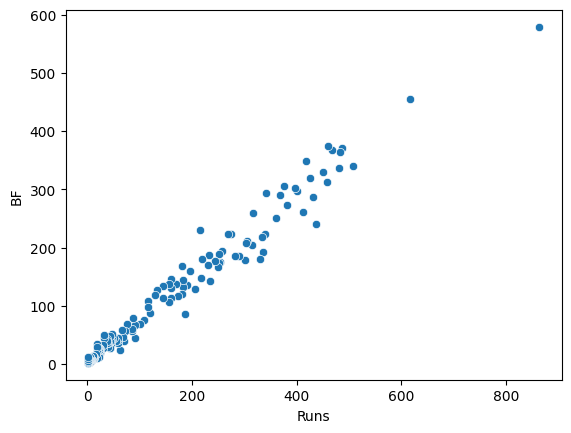

In [ ]:
sns.scatterplot(data = df,x="Runs",y="BF")
#scatterplot of runs and balls faced

the above plot shows a positive correlation between runs and no of balls faced, telling us that the more balls you face, the more runs you can make.

<Axes: xlabel='Avg', ylabel='BF'>

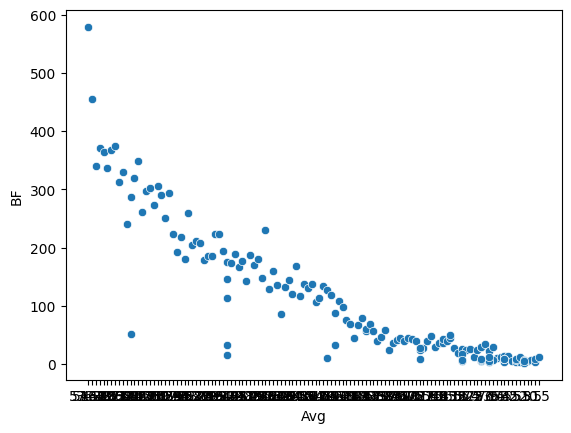

In [ ]:
sns.scatterplot(data = df,x="Avg",y="BF")
#scatterplot of avg and balls faced

### Categorical-Categorical

In [ ]:
cat

['NO', '100', '50']

<Axes: xlabel='100', ylabel='50'>

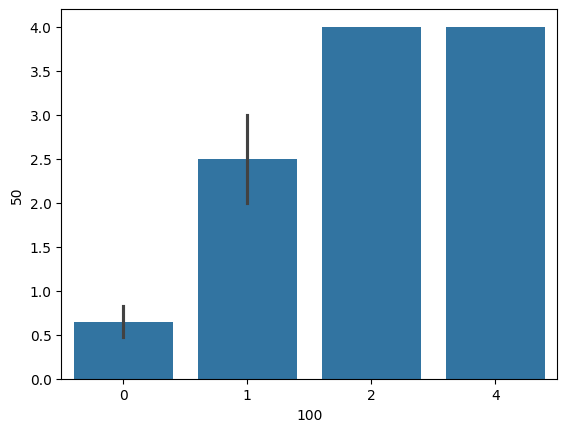

In [ ]:
#Bar plot of centuries with gross half centuries
sns.barplot(data=df,x="100",y="50")

number of half centuries are equal for players with 2,3,4 centuries.

<Axes: xlabel='100', ylabel='NO'>

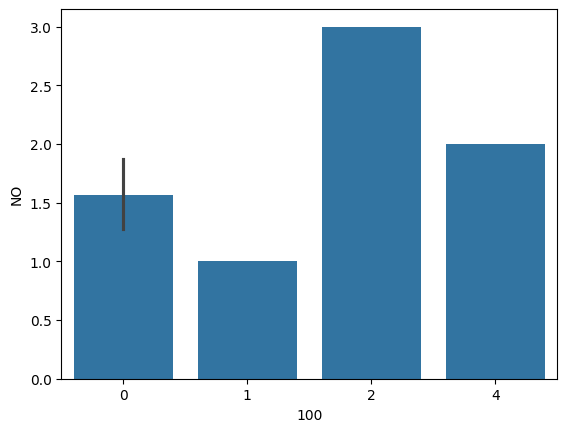

In [ ]:
#Bar plot of centuries with gross no
sns.barplot(data=df,x="100",y="NO")

# Categorical-Numerical

<Axes: xlabel='100', ylabel='Runs'>

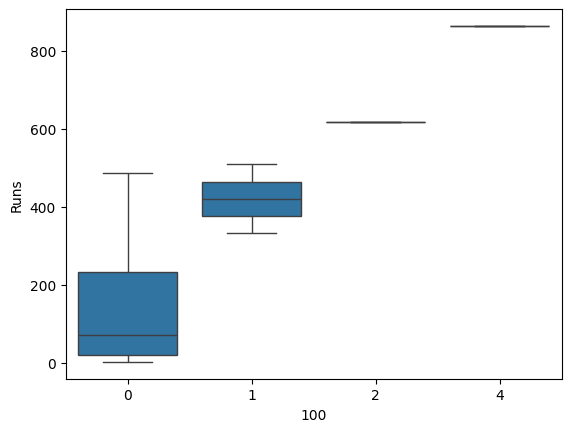

In [ ]:
sns.boxplot(data=df, x="100", y="Runs")

the number of runs made by players is more with more centuries but the number of players with more centuries are less.

In [ ]:
num

['POS', 'Player', 'Mat', 'Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR', '4s', '6s']

<Axes: xlabel='NO', ylabel='Player'>

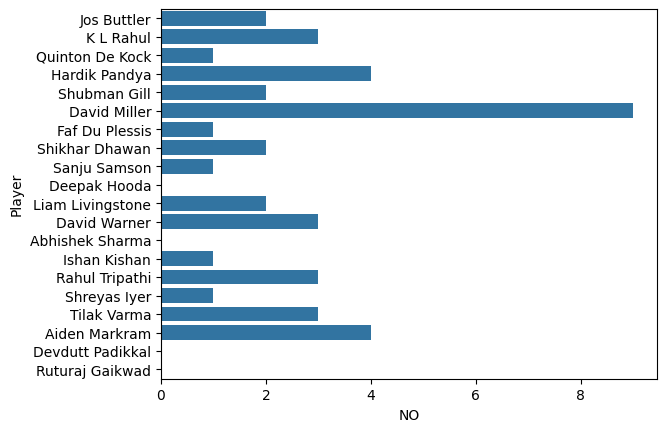

In [ ]:
sns.barplot(data=df.head(20),x="NO",y="Player")

<Axes: xlabel='Mat', ylabel='NO'>

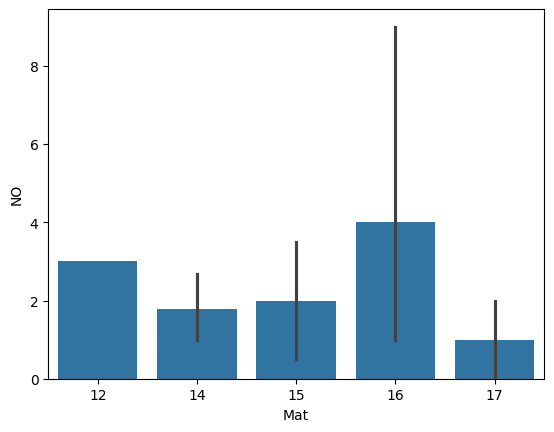

In [ ]:
sns.barplot(data=df.head(20),x="Mat",y="NO")

# CATEGORICAL AND CATEGORICAL

In [ ]:
cat

['NO', '100', '50']

In [ ]:
pd.crosstab(df['NO'],df['100'])

100,0,1,2,4
NO,,,,
0,55,0,0,0
1,33,2,0,0
2,27,0,0,1
3,18,0,1,0
4,7,0,0,0
5,3,0,0,0
6,4,0,0,0
8,1,0,0,0
9,1,0,0,0


In [ ]:
cat
num

['POS', 'Player', 'Mat', 'Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR', '4s', '6s']

<Axes: xlabel='NO', ylabel='100'>

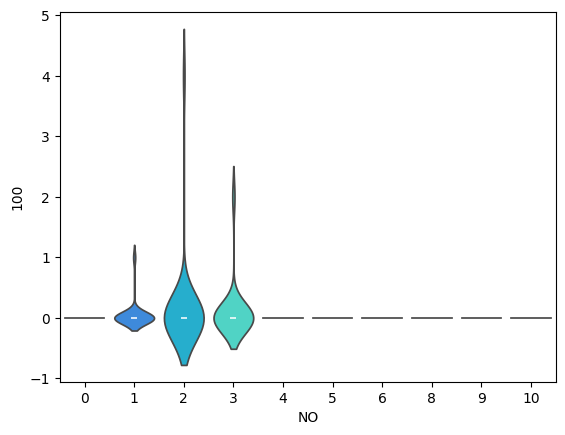

In [ ]:
sns.violinplot(x='NO',y='100',data=df,palette='rainbow')

<Axes: xlabel='50', ylabel='100'>

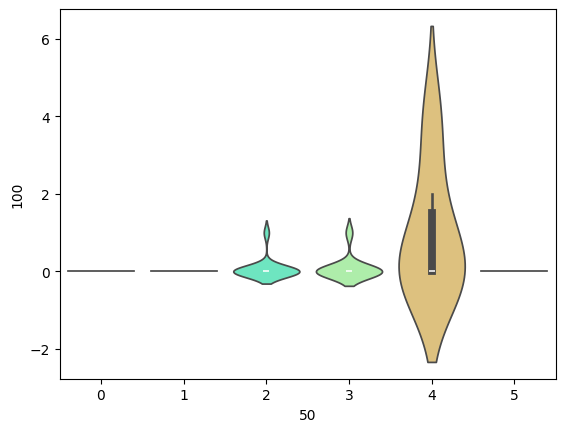

In [ ]:
sns.violinplot(x='50',y='100',data=df,palette='rainbow')

In [ ]:
# Chi2 test - Categorical and Categorical
contigency= pd.crosstab(df['50'], df['100'])
contigency

100,0,1,2,4
50,,,,
0,110,0,0,0
1,20,0,0,0
2,13,1,0,0
3,10,1,0,0
4,4,0,1,1
5,1,0,0,0


In [ ]:
contigency_pct = pd.crosstab(df['50'], df['100'], normalize='index')
contigency_pct

100,0,1,2,4
50,,,,
0,1.000000,0.000000,0.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000
2,0.928571,0.071429,0.000000,0.000000
3,0.909091,0.090909,0.000000,0.000000
4,0.666667,0.000000,0.166667,0.166667
5,1.000000,0.000000,0.000000,0.000000


<Axes: xlabel='100', ylabel='NO'>

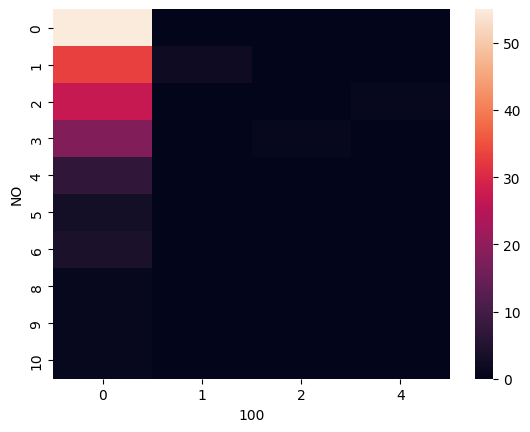

In [ ]:
sns.heatmap(pd.crosstab(df['NO'],df['100']))

In [ ]:
pd.crosstab(df['50'],df['100'])

100,0,1,2,4
50,,,,
0,102,0,0,0
1,20,0,0,0
2,13,1,0,0
3,10,1,0,0
4,4,0,1,1
5,1,0,0,0


<Axes: xlabel='100', ylabel='50'>

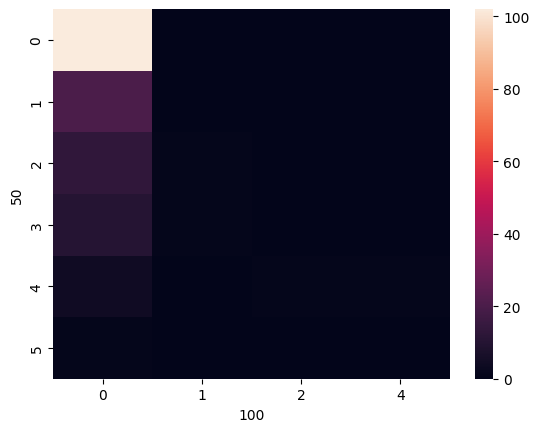

In [ ]:
sns.heatmap(pd.crosstab(df['50'],df['100']))

In [ ]:
pd.crosstab(df['50'],df['NO'])

NO,0,1,2,3,4,5,6,8,9,10
50,,,,,,,,,,
0,41,20,20,12,5,1,3,0,0,0
1,6,3,4,3,0,1,1,1,0,1
2,6,5,0,1,0,1,0,0,1,0
3,1,7,1,1,1,0,0,0,0,0
4,1,0,3,1,1,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0


<Axes: xlabel='NO', ylabel='50'>

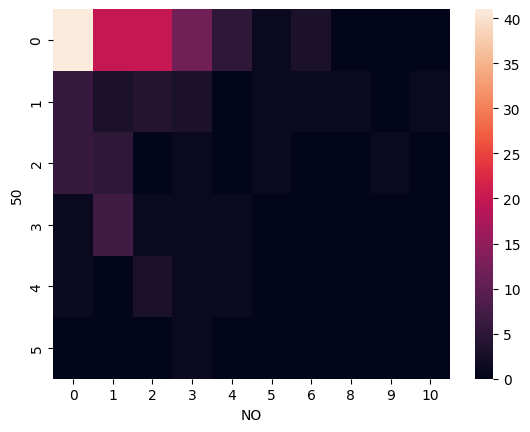

In [ ]:
sns.heatmap(pd.crosstab(df['50'],df['NO']))

How many centuries vs not out

Text(0, 0.5, 'NO')

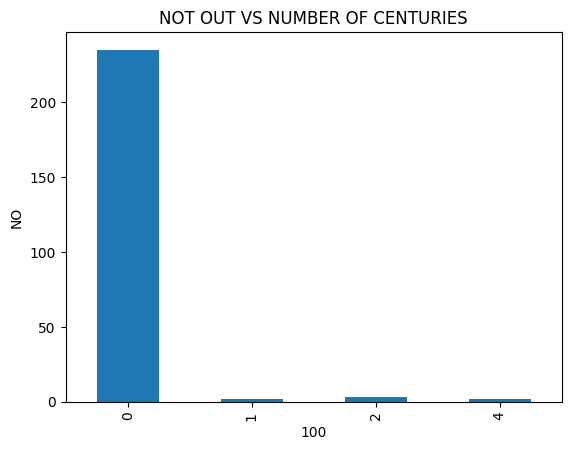

In [ ]:
(df.groupby('100').sum()['NO']).plot(kind="bar")

# Adding titles and labels
plt.title('NOT OUT VS NUMBER OF CENTURIES')
plt.xlabel('100')
plt.ylabel('NO')

Text(0, 0.5, 'NO')

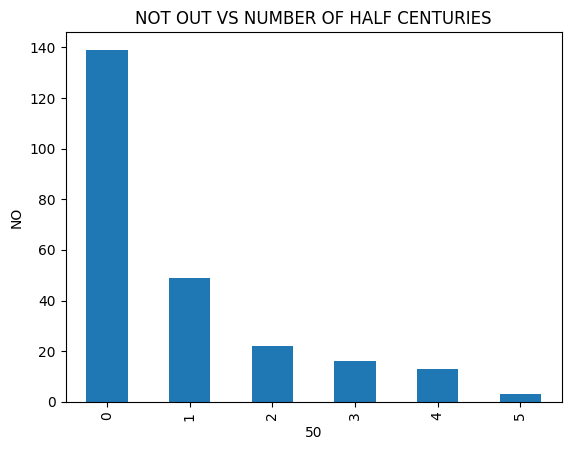

In [ ]:
(df.groupby('50').sum()['NO']).plot(kind="bar")

# Adding titles and labels
plt.title('NOT OUT VS NUMBER OF HALF CENTURIES')
plt.xlabel('50')
plt.ylabel('NO')

<Axes: xlabel='100', ylabel='NO'>

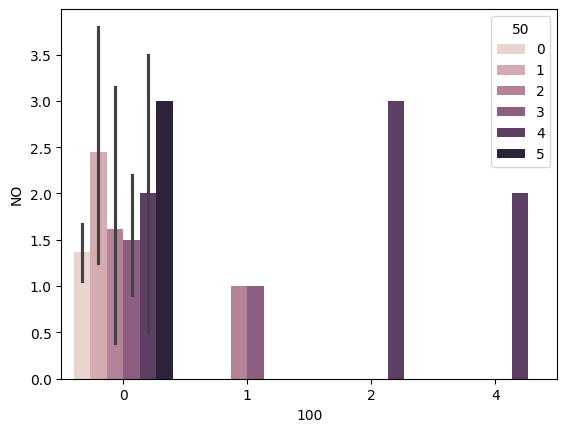

In [ ]:
sns.barplot(data=df,x="100",y="NO",hue="50")

In [ ]:
# t-test - Categorical and Numerical
tr=df.dropna(axis=0,how='any')
tr.describe()

,POS,Mat,Inns,NO,Runs,BF,SR,100,50,4s,6s
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,81.500000,9.160494,7.141975,1.586420,0.163917,0.181768,120.406235,0.049383,0.679012,12.450617,6.555556
std,46.909487,5.047493,4.816982,1.819989,0.187067,0.198220,45.192799,0.366322,1.172428,15.314529,8.070343
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.660000,0.000000,0.000000,0.000000,0.000000
25%,41.250000,5.000000,3.000000,0.000000,0.015661,0.022491,94.082500,0.000000,0.000000,1.000000,0.000000
50%,81.500000,9.500000,7.000000,1.000000,0.074246,0.080450,123.620000,0.000000,0.000000,5.000000,3.000000
75%,121.750000,14.000000,11.000000,2.000000,0.279002,0.303633,144.247500,0.000000,1.000000,21.000000,11.000000
max,162.000000,17.000000,17.000000,10.000000,1.000000,1.000000,400.000000,4.000000,5.000000,83.000000,45.000000


# ***CONCLUSION:***


*   Number of runs made by a player linearly increases with the number of ball faced.
*   players who scored century also lasted long in the game most of time.
*   increase in the number of balls faced by a player decreases their average score.
*   Players with more number of centuries also have scored significant number of half centuries.



